# Scaling

In [1]:
## EDA Standard Libary

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.stats as ss

In [2]:
#ML Library

#ML Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
#ML TrainTest Split
from sklearn.model_selection import train_test_split
#ML Report
from sklearn.metrics import  accuracy_score

In [4]:
tips = sns.load_dataset('tips')

In [5]:
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [6]:
#Transform using minmax scaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler


In [7]:
minmax = MinMaxScaler()
standard = StandardScaler()
robust = RobustScaler()

In [14]:
tips_minmax = minmax.fit_transform(tips[['tip']])

In [16]:
tips_minmax = pd.DataFrame(tips_minmax, columns=['tip'])
tips_minmax

,tip
0,0.001111
1,0.073333
2,0.277778
3,0.256667
4,0.290000
...,...
239,0.546667
240,0.111111
241,0.111111
242,0.083333


/var/folders/hp/56vw0j_10t7b71dy17hxntmh0000gp/T/ipykernel_8181/2471305248.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(tips_minmax['tip'])


<Axes: xlabel='tip', ylabel='Density'>

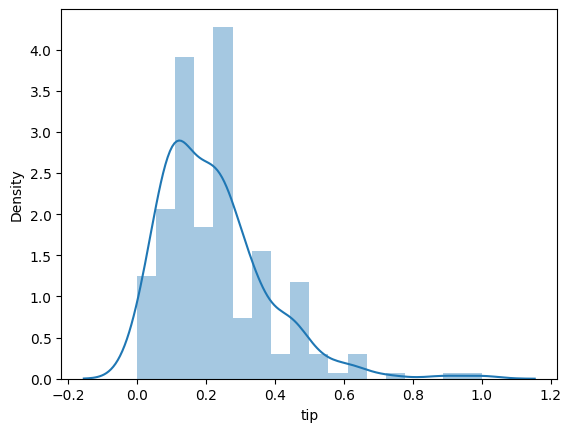

In [19]:
sns.distplot(tips_minmax['tip'])

In [17]:
#Robust scaler are used for outlier handling
tips_robust = robust.fit_transform(tips[['tip']])
tips_robust = pd.DataFrame(tips_robust, columns=['tip'])

In [18]:
tips_robust

,tip
0,-1.2096
1,-0.7936
2,0.3840
3,0.2624
4,0.4544
...,...
239,1.9328
240,-0.5760
241,-0.5760
242,-0.7360


/var/folders/hp/56vw0j_10t7b71dy17hxntmh0000gp/T/ipykernel_8181/3176080899.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(tips_robust['tip'])


<Axes: xlabel='tip', ylabel='Density'>

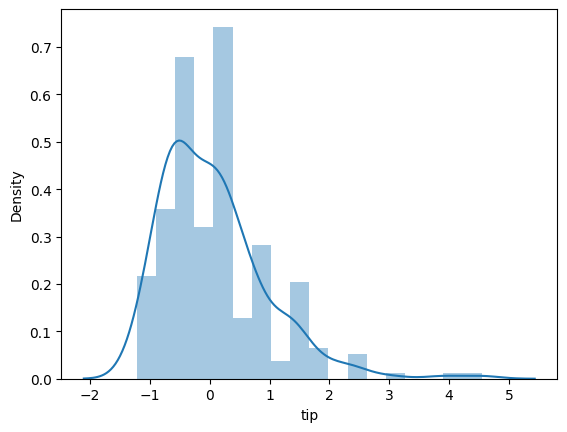

In [20]:
sns.distplot(tips_robust['tip'])

# Encoding


## 1. One Hot Encoding


In [22]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer   

In [23]:
transformer = ColumnTransformer([
                                 ('encoder',OneHotEncoder(),['sex','smoker','day','time'])
                                ])

In [24]:
tips_encoded = transformer.fit_transform(tips)

In [27]:
transformer.get_feature_names_out()

array(['encoder__sex_Female', 'encoder__sex_Male', 'encoder__smoker_No',
       'encoder__smoker_Yes', 'encoder__day_Fri', 'encoder__day_Sat',
       'encoder__day_Sun', 'encoder__day_Thur', 'encoder__time_Dinner',
       'encoder__time_Lunch'], dtype=object)

## Ordinal encoding


In [28]:
#Ordinal encoding
tips_ordinal_encoded = tips.copy()

In [29]:
!pip3 install category_encoders

  Obtaining dependency information for category_encoders from https://files.pythonhosted.org/packages/1f/e2/495811f12b2e90753fff0e42a07adb0370a725de17cc23a579ac9d3ca67c/category_encoders-2.6.2-py2.py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.8/81.8 kB 182.3 kB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 23.2 -> 23.2.1
[notice] To update, run: pip install --upgrade pip


In [30]:
import category_encoders as ce

In [31]:
ordinal_mapping = [{'col' : 'day', 
                    'mapping' : {None:0, 'Thur':1, 'Fri':2, 'Sat':3, 'Sun':4}}]

ordinal_encoder = ce.OrdinalEncoder(cols=['day'], mapping=ordinal_mapping)  

In [32]:
ordinal_encoder

OrdinalEncoder(cols=['day'],
               mapping=[{'col': 'day', 'data_type': dtype('O'),
                         'mapping': None    0
Thur    1
Fri     2
Sat     3
Sun     4
dtype: int64}])

In [35]:
day_ord_encoded = ordinal_encoder.fit_transform(tips_ordinal_encoded)  

In [36]:
day_ord_encoded

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,4,Dinner,2
1,10.34,1.66,Male,No,4,Dinner,3
2,21.01,3.50,Male,No,4,Dinner,3
3,23.68,3.31,Male,No,4,Dinner,2
4,24.59,3.61,Female,No,4,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,3,Dinner,3
240,27.18,2.00,Female,Yes,3,Dinner,2
241,22.67,2.00,Male,Yes,3,Dinner,2
242,17.82,1.75,Male,No,3,Dinner,2
